# Import datasets

In [2419]:
#Import pandas, and read the train file
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv', index_col="Id")

In [2420]:
#Check how many cols and rows the data has
print(df.shape)

(1460, 80)


In [2421]:
#Check the first five rows of the data
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2422]:
#Check a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# Exploratory Data Analysis

## Number Of Missing Values By Column

In [2423]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#the train data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
Heating,0,0.000000
HeatingQC,0,0.000000
MSZoning,0,0.000000
1stFlrSF,0,0.000000


In [2424]:
#List missing values only
missing.loc[missing['count']>0].sort_values(by='%', ascending=False)

,count,%
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


### Columns having more than 80% of missing values

I will drop the columns from 'PoolQC' to 'Fence' as they have more than 80% of missing values and these will not work efficiently on deciding prices. 

In [2425]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1)

In [2426]:
print(df.shape)

(1460, 76)


Columns are reduced from (1460, 80) to (1460, 76)

### FireplaceQu

In [2427]:
df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [2428]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [2429]:
fq = df[['FireplaceQu', 'Fireplaces']].loc[df['FireplaceQu'].isnull()]
fq['FireplaceQu'].append(fq['Fireplaces']).unique()

array([nan, 0], dtype=object)

In case of 'FieplaceQu', all missing values actually mean 'No Fireplace', which is same as 0 in 'Fireplaces' column.

I will make this column to int type as follows:
Ex - 5 /
Gd - 4 /
TA - 3 /
Fa - 2 /
Po - 1 /
NA - 0

In [2430]:
df['FireplaceQu'].replace('Ex', 5, inplace=True)
df['FireplaceQu'].replace('Gd', 4, inplace=True)
df['FireplaceQu'].replace('TA', 3, inplace=True)
df['FireplaceQu'].replace('Fa', 2, inplace=True)
df['FireplaceQu'].replace('Po', 1, inplace=True)
df['FireplaceQu'].fillna(0, inplace=True)

In [2431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### LotFrontage

In case of 'LotFrontage', I may can fill out with mean values of the column.

In [2432]:
df['LotFrontage'].max(), df['LotFrontage'].min(), df['LotFrontage'].mean()

(313.0, 21.0, 70.04995836802665)

However, 17.7% of the column are null and it looks dropping would be better.

In [2433]:
df = df.drop(['LotFrontage'], axis=1)

In [2434]:
print(df.shape)

(1460, 75)


Columns are reduced from (1460, 75) to (1460, 74)

### Garage related columns

In [2435]:
#Check if there is any abnormal data in 'GarageType' column
df['GarageType'].value_counts(), df['GarageType'].value_counts().sum()

(Attchd     870
 Detchd     387
 BuiltIn     88
 Basment     19
 CarPort      9
 2Types       6
 Name: GarageType, dtype: int64,
 1379)

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [2436]:
#Check if there is any abnormal data in 'GarageYrBlt' column
df['GarageYrBlt'].value_counts(), df['GarageYrBlt'].value_counts().sum()

(2005.0    65
 2006.0    59
 2004.0    53
 2003.0    50
 2007.0    49
           ..
 1908.0     1
 1927.0     1
 1933.0     1
 1900.0     1
 1906.0     1
 Name: GarageYrBlt, Length: 97, dtype: int64,
 1379)

In [2437]:
#Check if there is any abnormal data in 'GarageFinish' column
df['GarageFinish'].value_counts(), df['GarageFinish'].value_counts().sum()

(Unf    605
 RFn    422
 Fin    352
 Name: GarageFinish, dtype: int64,
 1379)

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [2438]:
#Check if there is any abnormal data in 'GarageQual' column
df['GarageQual'].value_counts(), df['GarageQual'].value_counts().sum()

(TA    1311
 Fa      48
 Gd      14
 Po       3
 Ex       3
 Name: GarageQual, dtype: int64,
 1379)

In [2439]:
#Check if there is any abnormal data in 'GarageCond' column
df['GarageCond'].value_counts(), df['GarageCond'].value_counts().sum()

(TA    1326
 Fa      35
 Gd       9
 Po       7
 Ex       2
 Name: GarageCond, dtype: int64,
 1379)

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

The null values actually would mean "No Garage", not really missing data.

In addition, we can assume that the columns 'Garage*' would have null for the same rows, let's double-check in another way if it is true.

In [2440]:
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
df[garage_cols].isnull().all(axis=0).unique()

array([False])

We could see that the null values over the 5 columns appear all in the same rows.<br>
For 'GarageYrBlt', I will replace the null values to 'YearBuilt' of the house.<br>
I will replace the others to "NoGrg" instead of dropping them.

In [2441]:
df = df.fillna({'GarageType':'NoGrg', 'GarageFinish':'NoGrg', 'GarageQual':'NoGrg', 'GarageCond':'NoGrg'})

In [2442]:
df['GarageYrBlt'].values

array([2003., 1976., 2001., ..., 1941., 1950., 1965.])

In [2443]:
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

In [2444]:
df[garage_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1460 non-null   object 
 1   GarageYrBlt   1460 non-null   float64
 2   GarageFinish  1460 non-null   object 
 3   GarageQual    1460 non-null   object 
 4   GarageCond    1460 non-null   object 
dtypes: float64(1), object(4)
memory usage: 68.4+ KB


Null is all gone in all 5 columns.

### Basement related columns

In [2445]:
#Check if there is any abnormal data in 'BsmtExposure' column
df['BsmtExposure'].value_counts(), df['BsmtExposure'].value_counts().sum()

(No    953
 Av    221
 Gd    134
 Mn    114
 Name: BsmtExposure, dtype: int64,
 1422)

In [2446]:
#Check if there is any abnormal data in 'BsmtFinType2' column
df['BsmtFinType2'].value_counts(), df['BsmtFinType2'].value_counts().sum()

(Unf    1256
 Rec      54
 LwQ      46
 BLQ      33
 ALQ      19
 GLQ      14
 Name: BsmtFinType2, dtype: int64,
 1422)

In [2447]:
#Check if there is any abnormal data in 'BsmtFinType1' column
df['BsmtFinType1'].value_counts(), df['BsmtFinType1'].value_counts().sum()

(Unf    430
 GLQ    418
 ALQ    220
 BLQ    148
 Rec    133
 LwQ     74
 Name: BsmtFinType1, dtype: int64,
 1423)

In [2448]:
#Check if there is any abnormal data in 'BsmtCond' column
df['BsmtCond'].value_counts(), df['BsmtCond'].value_counts().sum()

(TA    1311
 Gd      65
 Fa      45
 Po       2
 Name: BsmtCond, dtype: int64,
 1423)

In [2449]:
#Check if there is any abnormal data in 'BsmtQual' column
df['BsmtQual'].value_counts(), df['BsmtQual'].value_counts().sum()

(TA    649
 Gd    618
 Ex    121
 Fa     35
 Name: BsmtQual, dtype: int64,
 1423)

In [2450]:
#Create a list of Basement related columns that have null
bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

#Create a list of all basement related columns
bsmt_all_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

In [2451]:
n = df.loc[df[bsmt_cols].isnull().all(1)]
n[bsmt_all_cols].shape

(37, 9)

In [2452]:
n[bsmt_all_cols]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0,0,0,0
40,NaN,NaN,NaN,NaN,NaN,0,0,0,0
91,NaN,NaN,NaN,NaN,NaN,0,0,0,0
103,NaN,NaN,NaN,NaN,NaN,0,0,0,0
157,NaN,NaN,NaN,NaN,NaN,0,0,0,0
183,NaN,NaN,NaN,NaN,NaN,0,0,0,0
260,NaN,NaN,NaN,NaN,NaN,0,0,0,0
343,NaN,NaN,NaN,NaN,NaN,0,0,0,0
363,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [2453]:
#Check how many rows exist when both 'BsmtExposure' and 'BsmtFinType2' have null
n2 = df.loc[df[['BsmtExposure', 'BsmtFinType2']].isnull().all(1)]
n2[bsmt_cols].shape

(37, 5)

I expected I would get 38 rows, but got 37. This means that not the all null rows doesn't go along with this combination.

In [2454]:
n3 = df.loc[df[['BsmtExposure']].isnull().all(1)]
n3[bsmt_all_cols]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0,0,0,0
40,NaN,NaN,NaN,NaN,NaN,0,0,0,0
91,NaN,NaN,NaN,NaN,NaN,0,0,0,0
103,NaN,NaN,NaN,NaN,NaN,0,0,0,0
157,NaN,NaN,NaN,NaN,NaN,0,0,0,0
183,NaN,NaN,NaN,NaN,NaN,0,0,0,0
260,NaN,NaN,NaN,NaN,NaN,0,0,0,0
343,NaN,NaN,NaN,NaN,NaN,0,0,0,0
363,NaN,NaN,NaN,NaN,NaN,0,0,0,0


In [2455]:
n4 = df.loc[df[['BsmtFinType2']].isnull().all(1)]
n4[bsmt_all_cols]

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0,0,0,0
40,NaN,NaN,NaN,NaN,NaN,0,0,0,0
91,NaN,NaN,NaN,NaN,NaN,0,0,0,0
103,NaN,NaN,NaN,NaN,NaN,0,0,0,0
157,NaN,NaN,NaN,NaN,NaN,0,0,0,0
183,NaN,NaN,NaN,NaN,NaN,0,0,0,0
260,NaN,NaN,NaN,NaN,NaN,0,0,0,0
333,No,NaN,GLQ,TA,Gd,1124,479,1603,3206
343,NaN,NaN,NaN,NaN,NaN,0,0,0,0


ID 333 has null on only 'BsmtExposure' and ID 949 has null on only 'BsmtFinType2'

In [2456]:
joined = n3.merge(n4, left_index=True, right_index=True, how='outer')

In [2457]:
joined

,MSSubClass_x,MSZoning_x,LotArea_x,Street_x,LotShape_x,LandContour_x,Utilities_x,LotConfig_x,LandSlope_x,Neighborhood_x,...,EnclosedPorch_y,3SsnPorch_y,ScreenPorch_y,PoolArea_y,MiscVal_y,MoSold_y,YrSold_y,SaleType_y,SaleCondition_y,SalePrice_y
Id,,,,,,,,,,,,,,,,,,,,,
18,90.0,RL,10791.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,...,0.0,0.0,0.0,0.0,500.0,10.0,2006.0,WD,Normal,90000.0
40,90.0,RL,6040.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,WD,AdjLand,82000.0
91,20.0,RL,7200.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,WD,Normal,109900.0
103,90.0,RL,7018.0,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,...,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,WD,Alloca,118964.0
157,20.0,RL,7200.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,109500.0
183,20.0,RL,9060.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0.0,180.0,0.0,0.0,0.0,6.0,2007.0,WD,Normal,120000.0
260,20.0,RM,12702.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,97000.0
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,10.0,2009.0,WD,Normal,284000.0
343,90.0,RL,8544.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0.0,0.0,0.0,0.0,0.0,5.0,2006.0,WD,Normal,87500.0


By outer join, I got 39 rows which have null either 'BsmtExposure' or 'BsmtFinType2', and null on all other 'Bsmt####' rows.

After all, I can replace the null values on 'BsmtExposure','BsmtFinType2', 'BsmtFinType1', 'BsmtCond', and 'BsmtQual' to 'NoBsmt', instead of dropping them.

In [2458]:
df = df.fillna({'BsmtExposure':'NoBsmt', 'BsmtFinType2':'NoBsmt', 'BsmtFinType1':'NoBsmt', 'BsmtCond':'NoBsmt', 'BsmtQual':'NoBsmt'})

In [2459]:
n = df.loc[df[bsmt_cols].isnull().all(1)]
n[bsmt_all_cols].shape

(0, 9)

Null is all gone in all 5 columns.

### Masonry venner related columns

In [2460]:
#Check if there is any abnormal data in 'MasVnrType' column
df['MasVnrType'].value_counts(), df['MasVnrType'].value_counts().sum()

(None       864
 BrkFace    445
 Stone      128
 BrkCmn      15
 Name: MasVnrType, dtype: int64,
 1452)

###### Description
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	 None
       Stone	Stone

In [2461]:
#Check if there is any abnormal data in 'MasVnrArea' column
df['MasVnrArea'].value_counts(), df['MasVnrArea'].value_counts().sum()

(0.0      861
 72.0       8
 180.0      8
 108.0      8
 120.0      7
         ... 
 651.0      1
 337.0      1
 415.0      1
 293.0      1
 621.0      1
 Name: MasVnrArea, Length: 327, dtype: int64,
 1452)

The null values actually would mean "No masonry veneer area", not really missing data.

In addition, as same as the garage related columns, we can assume that these two columns would have null for the same rows, let's double-check.

In [2462]:
mas = ['MasVnrType', 'MasVnrArea']
n = df.loc[train[mas].isnull().all(1)]
n[mas].shape

(0, 2)

In [2463]:
mt = df.loc[df['MasVnrType'].isnull()]
mt['MasVnrType'].shape

(8,)

In [2464]:
ma = df.loc[df['MasVnrArea'].isnull()]
ma['MasVnrArea'].shape

(8,)

We could see that those columns have the same values for the same records.<br>
I will replace them to "NoMaVe".

In [2465]:
df = df.fillna({'MasVnrType':'NoMaVe', 'MasVnrArea':0})

In [2466]:
n = df.loc[train[mas].isnull().all(1)]
n[mas].shape

(0, 2)

Null is all gone in 2 columns.

### Electrical

In [2467]:
#Check if there is any abnormal data in 'Electrical' column
df['Electrical'].value_counts(), df['Electrical'].value_counts().sum()

(SBrkr    1334
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 Name: Electrical, dtype: int64,
 1459)

###### Description

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [2468]:
#Find out which row has the null
n = df.loc[df['Electrical'].isnull()]
n['Electrical']

Id
1380    NaN
Name: Electrical, dtype: object

In [2469]:
df.iloc[1377:1382, 37:42]

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF
Id,,,,,
1378,Ex,Y,SBrkr,984,620
1379,TA,Y,SBrkr,483,504
1380,Gd,Y,NaN,754,640
1381,TA,N,FuseF,864,0
1382,Ex,Y,SBrkr,2117,0


I will replace the null with 'SBrkr' as the majority of data have it.

In [2470]:
df = df.fillna({'Electrical':'SBrkr'})
df.iloc[1377:1382, 37:42]

,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF
Id,,,,,
1378,Ex,Y,SBrkr,984,620
1379,TA,Y,SBrkr,483,504
1380,Gd,Y,SBrkr,754,640
1381,TA,N,FuseF,864,0
1382,Ex,Y,SBrkr,2117,0


The null value in 'Electrical' for ID 1380 has been replaced.

## Other columns having no missing value

Check if each column has abnormal value or outlier refering to 'data_description.txt' file.

In [2471]:
df['MSSubClass'].value_counts().sort_values(ascending=False), df['MSSubClass'].value_counts().sum()

(20     536
 60     299
 50     144
 120     87
 30      69
 160     63
 70      60
 80      58
 90      52
 190     30
 85      20
 75      16
 45      12
 180     10
 40       4
 Name: MSSubClass, dtype: int64,
 1460)

In [2472]:
df['MSZoning'].value_counts().sort_values(ascending=False), df['MSZoning'].value_counts().sum()

(RL         1151
 RM          218
 FV           65
 RH           16
 C (all)      10
 Name: MSZoning, dtype: int64,
 1460)

In [2473]:
df['LotArea'].value_counts().sort_values(ascending=False), df['LotArea'].value_counts().sum()

(7200     25
 9600     24
 6000     17
 10800    14
 9000     14
          ..
 13682     1
 9587      1
 9588      1
 9590      1
 8123      1
 Name: LotArea, Length: 1073, dtype: int64,
 1460)

In [2474]:
df['Street'].value_counts().sort_values(ascending=False), df['Street'].value_counts().sum()

(Pave    1454
 Grvl       6
 Name: Street, dtype: int64,
 1460)

'Street' column can be dropped as the most values are 'Pave'.

In [2475]:
df = df.drop(['Street'], axis=1)

In [2476]:
print(df.shape)

(1460, 74)


In [2477]:
df['LotShape'].value_counts().sort_values(ascending=False), df['LotShape'].value_counts().sum()

(Reg    925
 IR1    484
 IR2     41
 IR3     10
 Name: LotShape, dtype: int64,
 1460)

In [2478]:
df['LandContour'].value_counts().sort_values(ascending=False), df['LandContour'].value_counts().sum()

(Lvl    1311
 Bnk      63
 HLS      50
 Low      36
 Name: LandContour, dtype: int64,
 1460)

In [2479]:
df['Utilities'].value_counts().sort_values(ascending=False), df['Utilities'].value_counts().sum()

(AllPub    1459
 NoSeWa       1
 Name: Utilities, dtype: int64,
 1460)

'Utilities' column can be dropped as the most values are 'AllPub'.

In [2480]:
df = df.drop(['Utilities'], axis=1)

In [2481]:
print(df.shape)

(1460, 73)


In [2482]:
df['LotConfig'].value_counts().sort_values(ascending=False), df['LotConfig'].value_counts().sum()

(Inside     1052
 Corner      263
 CulDSac      94
 FR2          47
 FR3           4
 Name: LotConfig, dtype: int64,
 1460)

In [2483]:
df['LandSlope'].value_counts().sort_values(ascending=False), df['LandSlope'].value_counts().sum()

(Gtl    1382
 Mod      65
 Sev      13
 Name: LandSlope, dtype: int64,
 1460)

In [2484]:
df['Neighborhood'].value_counts().sort_values(ascending=False), df['Neighborhood'].value_counts().sum()

(NAmes      225
 CollgCr    150
 OldTown    113
 Edwards    100
 Somerst     86
 Gilbert     79
 NridgHt     77
 Sawyer      74
 NWAmes      73
 SawyerW     59
 BrkSide     58
 Crawfor     51
 Mitchel     49
 NoRidge     41
 Timber      38
 IDOTRR      37
 ClearCr     28
 SWISU       25
 StoneBr     25
 MeadowV     17
 Blmngtn     17
 BrDale      16
 Veenker     11
 NPkVill      9
 Blueste      2
 Name: Neighborhood, dtype: int64,
 1460)

In [2485]:
df['Condition1'].value_counts().sort_values(ascending=False), df['Condition1'].value_counts().sum()

(Norm      1260
 Feedr       81
 Artery      48
 RRAn        26
 PosN        19
 RRAe        11
 PosA         8
 RRNn         5
 RRNe         2
 Name: Condition1, dtype: int64,
 1460)

In [2486]:
df['Condition2'].value_counts().sort_values(ascending=False), df['Condition2'].value_counts().sum()

(Norm      1445
 Feedr        6
 Artery       2
 PosN         2
 RRNn         2
 RRAn         1
 PosA         1
 RRAe         1
 Name: Condition2, dtype: int64,
 1460)

'Condition2' column can be dropped as the most values are 'Norm'.

In [2487]:
df = df.drop(['Condition2'], axis=1)

In [2488]:
print(df.shape)

(1460, 72)


In [2489]:
df['BldgType'].value_counts().sort_values(ascending=False), df['BldgType'].value_counts().sum()

(1Fam      1220
 TwnhsE     114
 Duplex      52
 Twnhs       43
 2fmCon      31
 Name: BldgType, dtype: int64,
 1460)

In [2490]:
df['HouseStyle'].value_counts().sort_values(ascending=False), df['HouseStyle'].value_counts().sum()

(1Story    726
 2Story    445
 1.5Fin    154
 SLvl       65
 SFoyer     37
 1.5Unf     14
 2.5Unf     11
 2.5Fin      8
 Name: HouseStyle, dtype: int64,
 1460)

In [2491]:
df['OverallQual'].value_counts().sort_values(ascending=False), df['OverallQual'].value_counts().sum()

(5     397
 6     374
 7     319
 8     168
 4     116
 9      43
 3      20
 10     18
 2       3
 1       2
 Name: OverallQual, dtype: int64,
 1460)

In [2492]:
df['OverallCond'].value_counts().sort_values(ascending=False), df['OverallCond'].value_counts().sum()

(5    821
 6    252
 7    205
 8     72
 4     57
 3     25
 9     22
 2      5
 1      1
 Name: OverallCond, dtype: int64,
 1460)

In [2493]:
df['YearBuilt'].value_counts().sort_values(ascending=False), df['YearBuilt'].value_counts().sum()

(2006    67
 2005    64
 2004    54
 2007    49
 2003    45
         ..
 2010     1
 1893     1
 1875     1
 1882     1
 1872     1
 Name: YearBuilt, Length: 112, dtype: int64,
 1460)

In [2494]:
df['YearRemodAdd'].value_counts().sort_values(ascending=False), df['YearRemodAdd'].value_counts().sum()

(1950    178
 2006     97
 2007     76
 2005     73
 2004     62
        ... 
 2010      6
 1952      5
 1986      5
 1983      5
 1951      4
 Name: YearRemodAdd, Length: 61, dtype: int64,
 1460)

In [2495]:
df['RoofStyle'].value_counts().sort_values(ascending=False), df['RoofStyle'].value_counts().sum()

(Gable      1141
 Hip         286
 Flat         13
 Gambrel      11
 Mansard       7
 Shed          2
 Name: RoofStyle, dtype: int64,
 1460)

In [2496]:
df['RoofMatl'].value_counts().sort_values(ascending=False), df['RoofMatl'].value_counts().sum()

(CompShg    1434
 Tar&Grv      11
 WdShngl       6
 WdShake       5
 Metal         1
 Membran       1
 Roll          1
 ClyTile       1
 Name: RoofMatl, dtype: int64,
 1460)

'RoofMatl' column can be dropped as the most values are 'CompShg'.

In [2497]:
df = df.drop(['RoofMatl'], axis=1)

In [2498]:
print(df.shape)

(1460, 71)


In [2499]:
df['Exterior1st'].value_counts().sort_values(ascending=False), df['Exterior1st'].value_counts().sum()

(VinylSd    515
 HdBoard    222
 MetalSd    220
 Wd Sdng    206
 Plywood    108
 CemntBd     61
 BrkFace     50
 WdShing     26
 Stucco      25
 AsbShng     20
 Stone        2
 BrkComm      2
 CBlock       1
 AsphShn      1
 ImStucc      1
 Name: Exterior1st, dtype: int64,
 1460)

In [2500]:
df['Exterior2nd'].value_counts().sort_values(ascending=False), df['Exterior2nd'].value_counts().sum()

(VinylSd    504
 MetalSd    214
 HdBoard    207
 Wd Sdng    197
 Plywood    142
 CmentBd     60
 Wd Shng     38
 Stucco      26
 BrkFace     25
 AsbShng     20
 ImStucc     10
 Brk Cmn      7
 Stone        5
 AsphShn      3
 CBlock       1
 Other        1
 Name: Exterior2nd, dtype: int64,
 1460)

In [2501]:
df['ExterQual'].value_counts().sort_values(ascending=False), df['ExterQual'].value_counts().sum()

(TA    906
 Gd    488
 Ex     52
 Fa     14
 Name: ExterQual, dtype: int64,
 1460)

In [2502]:
df['ExterCond'].value_counts().sort_values(ascending=False), df['ExterCond'].value_counts().sum()

(TA    1282
 Gd     146
 Fa      28
 Ex       3
 Po       1
 Name: ExterCond, dtype: int64,
 1460)

In [2503]:
df['Foundation'].value_counts().sort_values(ascending=False), df['Foundation'].value_counts().sum()

(PConc     647
 CBlock    634
 BrkTil    146
 Slab       24
 Stone       6
 Wood        3
 Name: Foundation, dtype: int64,
 1460)

In [2504]:
df['BsmtFinSF1'].value_counts().sort_values(ascending=False), df['BsmtFinSF1'].value_counts().sum()

(0       467
 24       12
 16        9
 616       5
 936       5
        ... 
 1441      1
 224       1
 223       1
 222       1
 404       1
 Name: BsmtFinSF1, Length: 637, dtype: int64,
 1460)

In [2505]:
df['BsmtFinSF2'].value_counts().sort_values(ascending=False), df['BsmtFinSF2'].value_counts().sum()

(0      1293
 180       5
 374       3
 279       2
 469       2
        ... 
 352       1
 764       1
 713       1
 692       1
 169       1
 Name: BsmtFinSF2, Length: 144, dtype: int64,
 1460)

In [2506]:
df['BsmtUnfSF'].value_counts().sort_values(ascending=False), df['BsmtUnfSF'].value_counts().sum()

(0       118
 728       9
 384       8
 572       7
 600       7
        ... 
 1078      1
 1079      1
 1082      1
 1085      1
 1777      1
 Name: BsmtUnfSF, Length: 780, dtype: int64,
 1460)

In [2507]:
df['TotalBsmtSF'].value_counts().sort_values(ascending=False), df['TotalBsmtSF'].value_counts().sum()

(0       37
 864     35
 672     17
 912     15
 1040    14
         ..
 1926     1
 662      1
 1842     1
 1766     1
 1614     1
 Name: TotalBsmtSF, Length: 721, dtype: int64,
 1460)

In [2508]:
df['Heating'].value_counts().sort_values(ascending=False), df['Heating'].value_counts().sum()

(GasA     1428
 GasW       18
 Grav        7
 Wall        4
 OthW        2
 Floor       1
 Name: Heating, dtype: int64,
 1460)

'Heating' column can be dropped as the most values are 'GasA'.

In [2509]:
df = df.drop(['Heating'], axis=1)

In [2510]:
print(df.shape)

(1460, 70)


In [2511]:
df['HeatingQC'].value_counts().sort_values(ascending=False), df['HeatingQC'].value_counts().sum()

(Ex    741
 TA    428
 Gd    241
 Fa     49
 Po      1
 Name: HeatingQC, dtype: int64,
 1460)

In [2512]:
df['CentralAir'].value_counts().sort_values(ascending=False), df['CentralAir'].value_counts().sum()

(Y    1365
 N      95
 Name: CentralAir, dtype: int64,
 1460)

In [2513]:
df['1stFlrSF'].value_counts().sort_values(ascending=False), df['1stFlrSF'].value_counts().sum()

(864     25
 1040    16
 912     14
 848     12
 894     12
         ..
 1586     1
 1582     1
 1578     1
 1576     1
 969      1
 Name: 1stFlrSF, Length: 753, dtype: int64,
 1460)

In [2514]:
df['2ndFlrSF'].value_counts().sort_values(ascending=False), df['2ndFlrSF'].value_counts().sum()

(0       829
 728      10
 504       9
 672       8
 546       8
        ... 
 1037      1
 1031      1
 1028      1
 892       1
 430       1
 Name: 2ndFlrSF, Length: 417, dtype: int64,
 1460)

In [2515]:
df['LowQualFinSF'].value_counts().sort_values(ascending=False), df['LowQualFinSF'].value_counts().sum()

(0      1434
 80        3
 360       2
 515       1
 528       1
 53        1
 120       1
 144       1
 156       1
 205       1
 232       1
 234       1
 384       1
 572       1
 390       1
 392       1
 397       1
 420       1
 473       1
 479       1
 481       1
 513       1
 514       1
 371       1
 Name: LowQualFinSF, dtype: int64,
 1460)

'LowQualFinSF' column can be dropped as the most values are 0.

In [2516]:
df = df.drop(['LowQualFinSF'], axis=1)

In [2517]:
print(df.shape)

(1460, 69)


In [2518]:
df['GrLivArea'].value_counts().sort_values(ascending=False), df['GrLivArea'].value_counts().sum()

(864     22
 1040    14
 894     11
 848     10
 1456    10
         ..
 1787     1
 1797     1
 1764     1
 1803     1
 2230     1
 Name: GrLivArea, Length: 861, dtype: int64,
 1460)

In [2519]:
df['BsmtFullBath'].value_counts().sort_values(ascending=False), df['BsmtFullBath'].value_counts().sum()

(0    856
 1    588
 2     15
 3      1
 Name: BsmtFullBath, dtype: int64,
 1460)

In [2520]:
df['BsmtHalfBath'].value_counts().sort_values(ascending=False), df['BsmtHalfBath'].value_counts().sum()

(0    1378
 1      80
 2       2
 Name: BsmtHalfBath, dtype: int64,
 1460)

In [2521]:
df['FullBath'].value_counts().sort_values(ascending=False), df['FullBath'].value_counts().sum()

(2    768
 1    650
 3     33
 0      9
 Name: FullBath, dtype: int64,
 1460)

In [2522]:
df['HalfBath'].value_counts().sort_values(ascending=False), df['HalfBath'].value_counts().sum()

(0    913
 1    535
 2     12
 Name: HalfBath, dtype: int64,
 1460)

In [2523]:
df['BedroomAbvGr'].value_counts().sort_values(ascending=False), df['BedroomAbvGr'].value_counts().sum()

(3    804
 2    358
 4    213
 1     50
 5     21
 6      7
 0      6
 8      1
 Name: BedroomAbvGr, dtype: int64,
 1460)

In [2524]:
df['KitchenAbvGr'].value_counts().sort_values(ascending=False), df['KitchenAbvGr'].value_counts().sum()

(1    1392
 2      65
 3       2
 0       1
 Name: KitchenAbvGr, dtype: int64,
 1460)

In [2525]:
df['KitchenQual'].value_counts().sort_values(ascending=False), df['KitchenQual'].value_counts().sum()

(TA    735
 Gd    586
 Ex    100
 Fa     39
 Name: KitchenQual, dtype: int64,
 1460)

In [2526]:
df['TotRmsAbvGrd'].value_counts().sort_values(ascending=False), df['TotRmsAbvGrd'].value_counts().sum()

(6     402
 7     329
 5     275
 8     187
 4      97
 9      75
 10     47
 11     18
 3      17
 12     11
 2       1
 14      1
 Name: TotRmsAbvGrd, dtype: int64,
 1460)

In [2527]:
df['Functional'].value_counts().sort_values(ascending=False), df['Functional'].value_counts().sum()

(Typ     1360
 Min2      34
 Min1      31
 Mod       15
 Maj1      14
 Maj2       5
 Sev        1
 Name: Functional, dtype: int64,
 1460)

In [2528]:
df['Fireplaces'].value_counts().sort_values(ascending=False), df['Fireplaces'].value_counts().sum()

(0    690
 1    650
 2    115
 3      5
 Name: Fireplaces, dtype: int64,
 1460)

In [2529]:
df['GarageCars'].value_counts().sort_values(ascending=False), df['GarageCars'].value_counts().sum()

(2    824
 1    369
 3    181
 0     81
 4      5
 Name: GarageCars, dtype: int64,
 1460)

In [2530]:
df['GarageArea'].value_counts().sort_values(ascending=False), df['GarageArea'].value_counts().sum()

(0       81
 440     49
 576     47
 240     38
 484     34
         ..
 319      1
 261      1
 318      1
 309      1
 1418     1
 Name: GarageArea, Length: 441, dtype: int64,
 1460)

In [2531]:
df['PavedDrive'].value_counts().sort_values(ascending=False), df['PavedDrive'].value_counts().sum()

(Y    1340
 N      90
 P      30
 Name: PavedDrive, dtype: int64,
 1460)

In [2532]:
df['WoodDeckSF'].value_counts().sort_values(ascending=False), df['WoodDeckSF'].value_counts().sum()

(0      761
 192     38
 100     36
 144     33
 120     31
       ... 
 406      1
 409      1
 414      1
 416      1
 35       1
 Name: WoodDeckSF, Length: 274, dtype: int64,
 1460)

In [2533]:
df['OpenPorchSF'].value_counts().sort_values(ascending=False), df['OpenPorchSF'].value_counts().sum()

(0      656
 36      29
 48      22
 20      21
 40      19
       ... 
 224      1
 229      1
 231      1
 235      1
 119      1
 Name: OpenPorchSF, Length: 202, dtype: int64,
 1460)

In [2534]:
df['EnclosedPorch'].value_counts().sort_values(ascending=False), df['EnclosedPorch'].value_counts().sum()

(0      1252
 112      15
 96        6
 120       5
 144       5
        ... 
 286       1
 218       1
 220       1
 226       1
 37        1
 Name: EnclosedPorch, Length: 120, dtype: int64,
 1460)

In [2535]:
df['3SsnPorch'].value_counts().sort_values(ascending=False), df['3SsnPorch'].value_counts().sum()

(0      1436
 168       3
 216       2
 144       2
 180       2
 23        1
 245       1
 238       1
 290       1
 196       1
 508       1
 407       1
 304       1
 162       1
 153       1
 320       1
 140       1
 130       1
 96        1
 182       1
 Name: 3SsnPorch, dtype: int64,
 1460)

'3SsnPorch' column can be dropped as the most values are 0.

In [2536]:
df = df.drop(['3SsnPorch'], axis=1)

In [2537]:
print(df.shape)

(1460, 68)


In [2538]:
df['ScreenPorch'].value_counts().sort_values(ascending=False), df['ScreenPorch'].value_counts().sum()

(0      1344
 192       6
 224       5
 120       5
 189       4
        ... 
 273       1
 271       1
 266       1
 265       1
 99        1
 Name: ScreenPorch, Length: 76, dtype: int64,
 1460)

In [2539]:
df['PoolArea'].value_counts().sort_values(ascending=False), df['PoolArea'].value_counts().sum()

(0      1453
 480       1
 512       1
 519       1
 555       1
 576       1
 648       1
 738       1
 Name: PoolArea, dtype: int64,
 1460)

'PoolArea' column can be dropped as the most values are 0.

In [2540]:
df = df.drop(['PoolArea'], axis=1)

In [2541]:
print(df.shape)

(1460, 67)


In [2542]:
df['MiscVal'].value_counts().sort_values(ascending=False), df['MiscVal'].value_counts().sum()

(0        1408
 400        11
 500         8
 700         5
 450         4
 2000        4
 600         4
 1200        2
 480         2
 1150        1
 54          1
 8300        1
 15500       1
 620         1
 3500        1
 560         1
 2500        1
 1300        1
 1400        1
 350         1
 800         1
 Name: MiscVal, dtype: int64,
 1460)

As 'MiscFeature' has been dropped at the beginning, 'MiscVal' is useless and dropping as well.

In [2543]:
df = df.drop(['MiscVal'], axis=1)

In [2544]:
print(df.shape)

(1460, 66)


In [2545]:
df['MoSold'].value_counts().sort_values(ascending=False), df['MoSold'].value_counts().sum()

(6     253
 7     234
 5     204
 4     141
 8     122
 3     106
 10     89
 11     79
 9      63
 12     59
 1      58
 2      52
 Name: MoSold, dtype: int64,
 1460)

In [2546]:
df['YrSold'].value_counts().sort_values(ascending=False), df['YrSold'].value_counts().sum()

(2009    338
 2007    329
 2006    314
 2008    304
 2010    175
 Name: YrSold, dtype: int64,
 1460)

In [2547]:
df['SaleType'].value_counts().sort_values(ascending=False), df['SaleType'].value_counts().sum()

(WD       1267
 New       122
 COD        43
 ConLD       9
 ConLw       5
 ConLI       5
 CWD         4
 Oth         3
 Con         2
 Name: SaleType, dtype: int64,
 1460)

In [2548]:
df['SaleCondition'].value_counts().sort_values(ascending=False), df['SaleCondition'].value_counts().sum()

(Normal     1198
 Partial     125
 Abnorml     101
 Family       20
 Alloca       12
 AdjLand       4
 Name: SaleCondition, dtype: int64,
 1460)

In [2549]:
#Check a summary of the data again after dropped some columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

# Things to do

- 'GarageYrBlt' needs to be transited to date format

- All square feet data columns has too many unique rows, how to deal with them?

# Idea for the next

- Drop 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2' and 'BsmtUnfSF' as 'TotalBsmtSF' would be enough for buyser in general.

- Sum 'BsmtFullBath' & 'FullBath' / 'BsmtHalfBath' & 'HalfBath' as people usually consider the total bathrooms / half bathroom in the property, not by level.

- Drop 'BedroomAbvGr' as 'TotRmsAbvGrd' would be more useful in general




In [2550]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1460.0,103.117123,180.731373,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


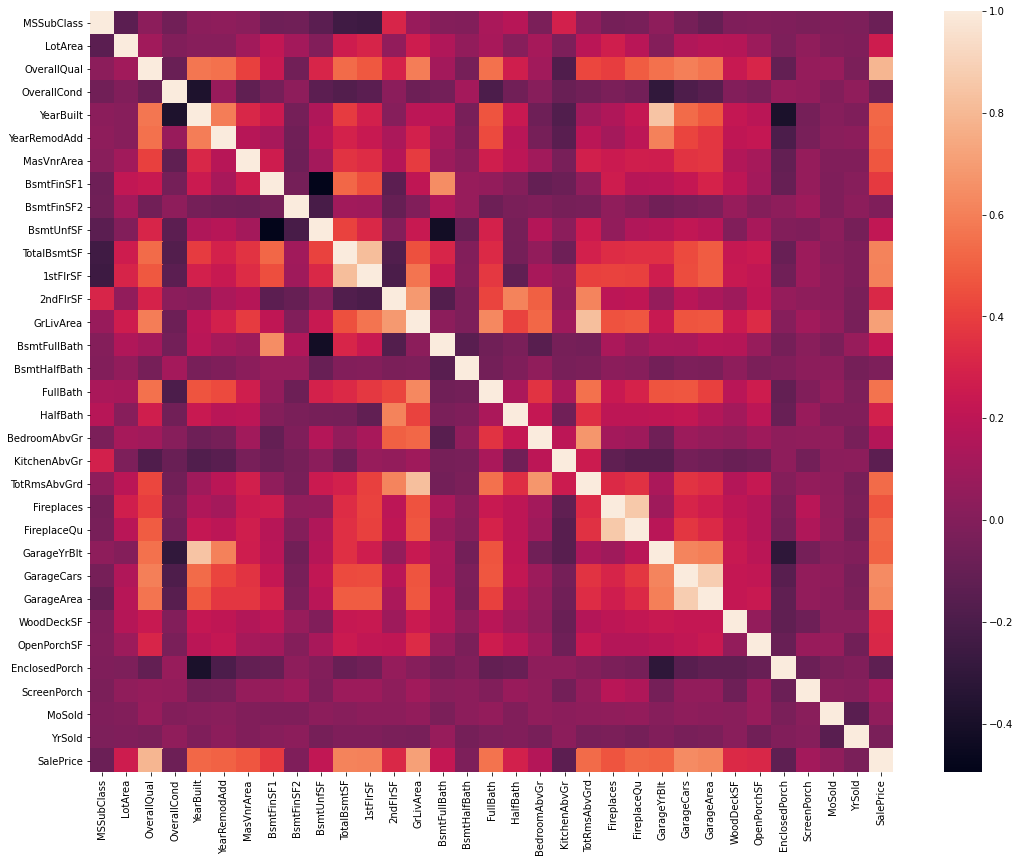

In [2551]:
# Draw a heatmap to see the relationships among columns
plt.figure(figsize=(18, 14))
heatmap = sns.heatmap(df.corr())

Checking non numeric columns so that convert them to numeric type for exploring the relationship as many as I can.<br>

####   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 1   MSZoning       1460 non-null   object <br>
 3   LotShape       1460 non-null   object <br>
 4   LandContour    1460 non-null   object <br>
 5   LotConfig      1460 non-null   object <br>
 6   LandSlope      1460 non-null   object <br>
 7   Neighborhood   1460 non-null   object <br>
 8   Condition1     1460 non-null   object <br>
 9   BldgType       1460 non-null   object <br>
 10  HouseStyle     1460 non-null   object <br>
 15  RoofStyle      1460 non-null   object <br>
 16  Exterior1st    1460 non-null   object <br>
 17  Exterior2nd    1460 non-null   object <br>
 18  MasVnrType     1460 non-null   object <br>
 20  ExterQual      1460 non-null   object <br>
 21  ExterCond      1460 non-null   object <br>
 22  Foundation     1460 non-null   object <br>
 23  BsmtQual       1460 non-null   object <br>
 24  BsmtCond       1460 non-null   object <br>
 25  BsmtExposure   1460 non-null   object <br>
 26  BsmtFinType1   1460 non-null   object <br>
 28  BsmtFinType2   1460 non-null   object <br>
 32  HeatingQC      1460 non-null   object <br>
 33  CentralAir     1460 non-null   object <br>
 34  Electrical     1460 non-null   object <br>
 44  KitchenQual    1460 non-null   object <br>
 46  Functional     1460 non-null   object <br>
 49  GarageType     1460 non-null   object <br>
 51  GarageFinish   1460 non-null   object <br>
 54  GarageQual     1460 non-null   object <br>
 55  GarageCond     1460 non-null   object <br>
 56  PavedDrive     1460 non-null   object <br>
 63  SaleType       1460 non-null   object <br>
 64  SaleCondition  1460 non-null   object <br>

In [2552]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Numerizing the non-numeric columns; bigger values, bigger numbers

In [2553]:
df['MSZoning'].replace({'C (all)': 1, 'RH': 2, 'FV': 3, 'RM': 4, 'RL': 5}, inplace=True)

In [2554]:
df['MSZoning'].value_counts()

5    1151
4     218
3      65
2      16
1      10
Name: MSZoning, dtype: int64

In [2555]:
df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [2556]:
df['LotShape'].replace({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4}, inplace=True)

In [2557]:
df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [2558]:
df['LandContour'].replace({'Low': 1, 'HLS': 2, 'Bnk': 3, 'Lvl': 4}, inplace=True)

In [2559]:
df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [2560]:
df['LotConfig'].replace({}, inplace=True)

In [2561]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [2562]:
df['LandSlope'].replace({'Sev':1, 'Mod': 2, 'Gtl':3}, inplace=True)

In [2563]:
df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [2564]:
df['Neighborhood'].replace({'Blueste':1, 'NPkVill':2, 'Veenker':3, 'BrDale':4, 'MeadowV':5, 'Blmngtn':6,
                              'StoneBr':7, 'SWISU':8, 'ClearCr':9, 'IDOTRR':10, 'Timber':11, 'NoRidge':12,
                              'Mitchel':13, 'Crawfor':14, 'BrkSide':15, 'SawyerW':16, 'NWAmes':17, 'Sawyer':18,
                              'NridgHt':19, 'Gilbert':20, 'Somerst':21, 'Edwards':22, 'OldTown':23,
                              'CollgCr':24, 'NAmes':25}, inplace=True)

In [2565]:
df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [2566]:
df['Condition1'].replace({'RRNe':1, 'RRNn':2, 'PosA':3, 'RRAe':4, 'PosN':5, 'RRAn':6,
                            'Artery':7, 'Feedr':8, 'Norm':9}, inplace=True)

In [2567]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [2568]:
df['BldgType'].replace({'2fmCon':1, 'Twnhs':2, 'Duplex':3, 'TwnhsE':4, '1Fam':5}, inplace=True)

In [2569]:
df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [2570]:
df['HouseStyle'].replace({'2.5Fin':1, '2.5Unf':2, '1.5Unf':3, 'SFoyer':4,
                            'SLvl':5, '1.5Fin':6, '2Story':7, '1Story':8}, inplace=True)

In [2571]:
df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [2572]:
df['RoofStyle'].replace({'Shed':1, 'Mansard':2, 'Gambrel':3, 'Flat':4, 'Hip':5, 'Gable':6}, inplace=True)

In [2573]:
df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [2574]:
df['Exterior1st'].replace({'AsphShn':1, 'ImStucc':2, 'CBlock':3, 'BrkComm':4, 'Stone':5, 'AsbShng':6,
                             'Stucco':7, 'WdShing':8, 'BrkFace':9, 'CemntBd':10, 'Plywood':11, 'Wd Sdng':12,
                             'MetalSd':13, 'HdBoard':14, 'VinylSd':15}, inplace=True)

In [2575]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [2576]:
df['Exterior2nd'].replace({'Other':1, 'CBlock':2, 'AsphShn':3, 'Stone':4, 'Brk Cmn':5, 'ImStucc':6,
                             'AsbShng':7, 'BrkFace':8, 'Stucco':9, 'Wd Shng':10, 'CmentBd':11, 'Plywood':12,
                             'Wd Sdng':13, 'HdBoard':14, 'MetalSd':15, 'VinylSd':16}, inplace=True)

In [2577]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
NoMaVe       8
Name: MasVnrType, dtype: int64

In [2578]:
df['MasVnrType'].replace({'NoMaVe':1, 'BrkCmn':2, 'Stone':3, 'BrkFace':4, 'None':5}, inplace=True)

In [2579]:
df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In case of quality/condition, regardless of the frequency, highest gets bigger as follows;<br>
Ex	Excellent --> 5<br>
Gd	Good --> 4<br>
TA	Average/Typical --> 3<br>
Fa	Fair --> 2<br>
Po	Poor --> 1<br>

In [2580]:
#train['ExterQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [2581]:
df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [2582]:
df['ExterCond'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [2583]:
df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [2584]:
df['Foundation'].replace({'Wood':1, 'Stone':2, 'Slab':3, 'BrkTil':4, 'CBlock':5, 'PConc':6}, inplace=True)

In [2585]:
df['BsmtQual'].value_counts()

TA        649
Gd        618
Ex        121
NoBsmt     37
Fa         35
Name: BsmtQual, dtype: int64

In [2586]:
df['BsmtQual'].replace({'NoBsmt':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [2587]:
df['BsmtCond'].value_counts()

TA        1311
Gd          65
Fa          45
NoBsmt      37
Po           2
Name: BsmtCond, dtype: int64

In [2588]:
df['BsmtCond'].replace({'NoBsmt':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [2589]:
df['BsmtExposure'].value_counts()

No        953
Av        221
Gd        134
Mn        114
NoBsmt     38
Name: BsmtExposure, dtype: int64

In [2590]:
df['BsmtExposure'].replace({'NoBsmt':0, 'No':1, 'Mn':2, 'Gd':3}, inplace=True)

In [2591]:
df['BsmtFinType1'].value_counts()

Unf       430
GLQ       418
ALQ       220
BLQ       148
Rec       133
LwQ        74
NoBsmt     37
Name: BsmtFinType1, dtype: int64

In [2592]:
df['BsmtFinType1'].replace({'NoBsmt':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

In [2593]:
df['BsmtFinType2'].value_counts()

Unf       1256
Rec         54
LwQ         46
NoBsmt      38
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64

In [2594]:
df['BsmtFinType2'].replace({'NoBsmt':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

In [2595]:
df['HeatingQC'].value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [2596]:
df['HeatingQC'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [2597]:
df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [2598]:
df['CentralAir'].replace({'N':0, 'Y':1}, inplace=True)

In [2599]:
df['Electrical'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [2600]:
df['Electrical'].replace({'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5}, inplace=True)

In [2601]:
df['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [2602]:
#df['KitchenQual'].replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [2603]:
df['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [2604]:
df['Functional'].replace({'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7}, inplace=True)

In [2605]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NoGrg       81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [2606]:
df['GarageType'].replace({'2Types':1, 'CarPort':2, 'Basment':3, 'NoGrg':4, 'BuiltIn':5, 'Detchd':6, 'Attchd':7}, inplace=True)

In [2607]:
df['GarageFinish'].value_counts()

Unf      605
RFn      422
Fin      352
NoGrg     81
Name: GarageFinish, dtype: int64

In [2608]:
df['GarageFinish'].replace({'NoGrg':1, 'Unf':2, 'RFn':3, 'Fin':4}, inplace=True)

In [2609]:
df['GarageQual'].value_counts()

TA       1311
NoGrg      81
Fa         48
Gd         14
Po          3
Ex          3
Name: GarageQual, dtype: int64

In [2610]:
df['GarageQual'].replace({'NoGrg':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [2611]:
df['GarageCond'].value_counts()

TA       1326
NoGrg      81
Fa         35
Gd          9
Po          7
Ex          2
Name: GarageCond, dtype: int64

In [2612]:
df['GarageCond'].replace({'NoGrg':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [2613]:
df['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [2614]:
df['PavedDrive'].replace({'N':1, 'P':2, 'Y':3}, inplace=True)

In [2615]:
df['SaleType'].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [2616]:
df['SaleType'].replace({'WD':9, 'CWD':8, 'New':7, 'COD':6, 'Con':5, 'ConLw':4, 'ConLI':3, 'ConLD':2, 'Oth':1}, inplace=True)

In [2617]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [2618]:
df['SaleCondition'].replace({'AdjLand':1, 'Alloca':2, 'Family':3, 'Abnorml':4, 'Partial':5, 'Normal':6}, inplace=True)

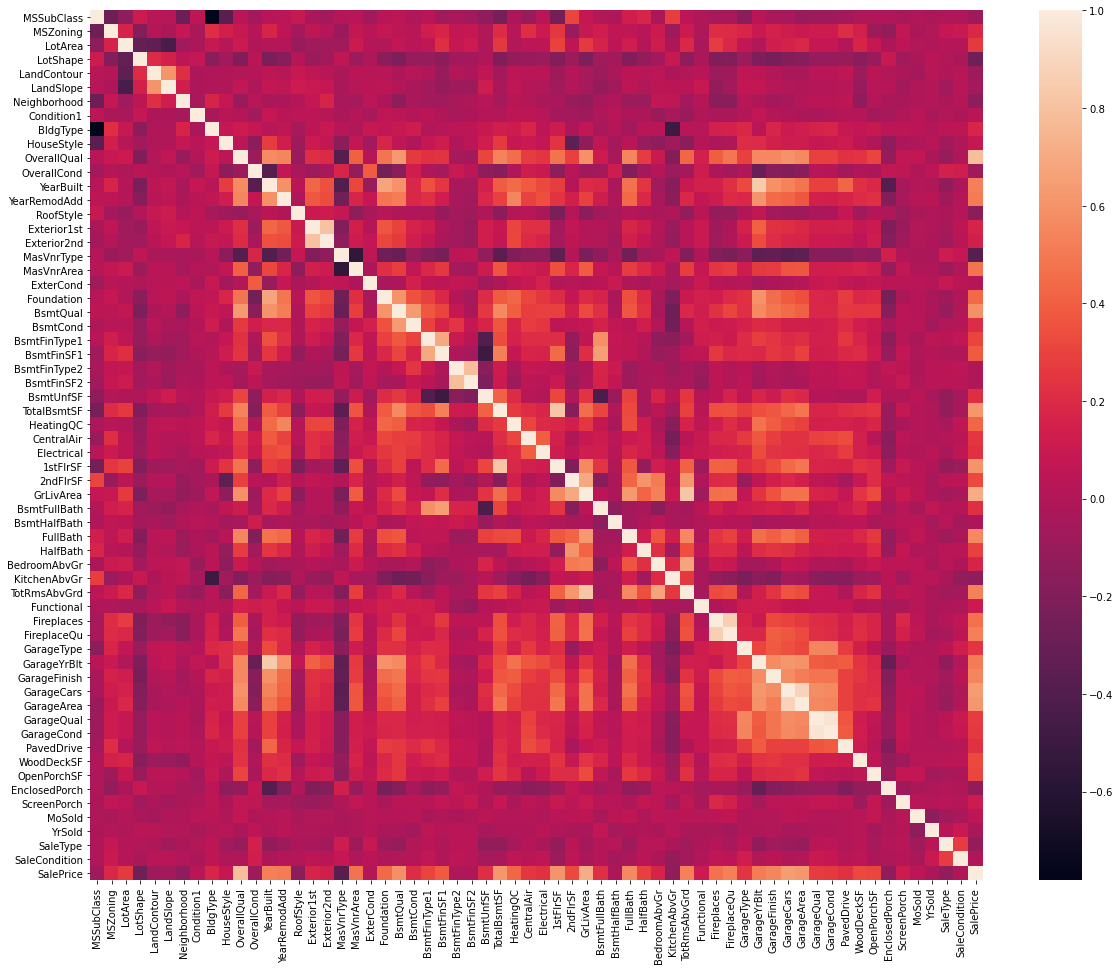

In [2619]:
# Draw a heatmap to see the relationships among columns
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(df.corr())

From the heatmap, we can see below columns are correlated with our target, 'SalePrice', so I will visualize them to see the relationship with 'SalePrice':<br>
'OverallQual', 'ExterQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea'

In [2620]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondi

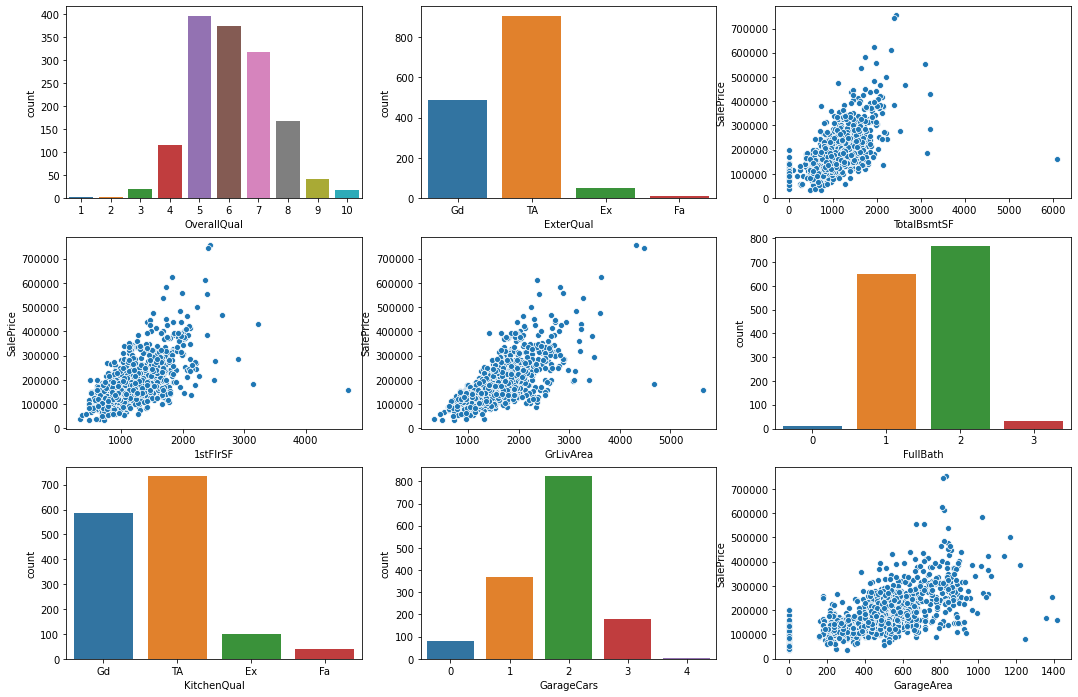

In [2621]:
# Visualize each features
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(18, 12)

# Use countplot for discrete columns and scatterplot for continuous columns
sns.countplot(data=df, x="OverallQual", ax=ax1)
sns.countplot(data=df, x="ExterQual", ax=ax2)
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", ax=ax3)
sns.scatterplot(data=df, x="1stFlrSF", y="SalePrice", ax=ax4)
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", ax=ax5)
sns.countplot(data=df, x="FullBath", ax=ax6)
sns.countplot(data=df, x="KitchenQual", ax=ax7)
sns.countplot(data=df, x="GarageCars", ax=ax8)
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", ax=ax9)

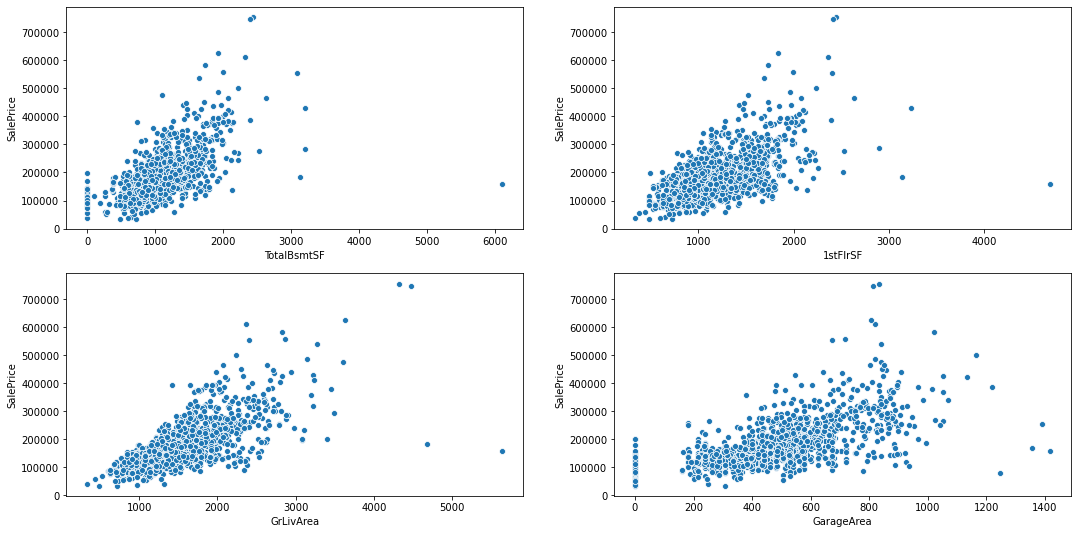

In [2622]:
# Visualize each features
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18, 9)

# Use countplot for discrete columns and scatterplot for continuous columns
sns.scatterplot(data=df, x="TotalBsmtSF", y="SalePrice", ax=ax1)
sns.scatterplot(data=df, x="1stFlrSF", y="SalePrice", ax=ax2)
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", ax=ax3)
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", ax=ax4)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


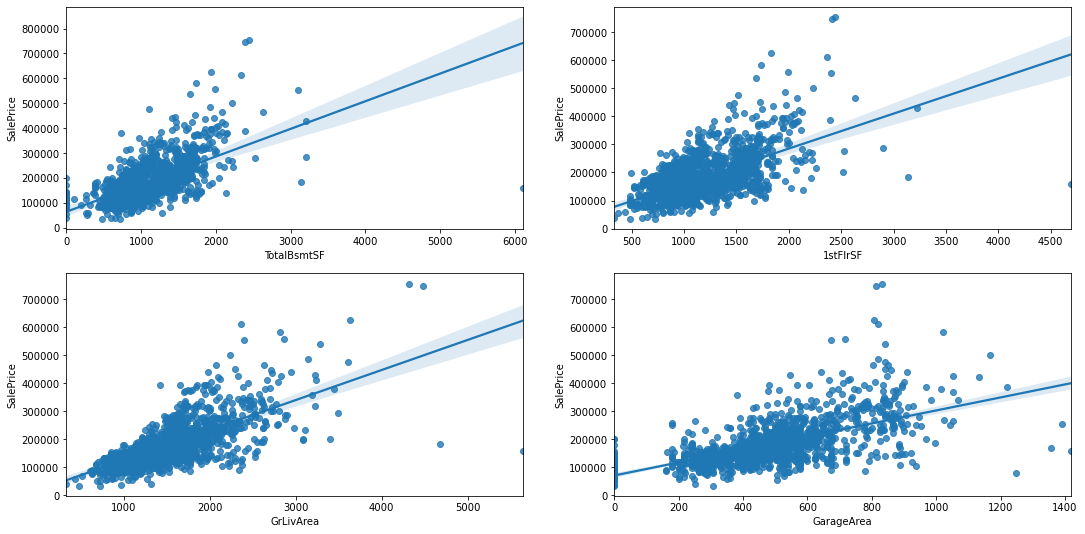

In [2623]:
# regplot for continuous columns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18, 9)

sns.regplot(data=df, x="TotalBsmtSF", y="SalePrice", ax=ax1)
sns.regplot(data=df, x="1stFlrSF", y="SalePrice", ax=ax2)
sns.regplot(data=df, x="GrLivArea", y="SalePrice", ax=ax3)
sns.regplot(data=df, x="GarageArea", y="SalePrice", ax=ax4)

As seen from the plots above, 'TotalBsmtSF', '1stFlrSF', and 'GrLivArea' are positively related to the 'SalePrice'.

# Pre-processing and Training Data Development (Unit 16.3.1)

### Get dummy features

Use get_dummies() function for columns which values are not in mathematical relationship.

In [2624]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,5,8450,4,4,Inside,3,24,9,5,...,3,0,61,0,0,2,2008,9,6,208500
2,20,5,9600,4,4,FR2,3,3,8,5,...,3,298,0,0,0,5,2007,9,6,181500
3,60,5,11250,3,4,Inside,3,24,9,5,...,3,0,42,0,0,9,2008,9,6,223500
4,70,5,9550,3,4,Corner,3,14,9,5,...,3,0,35,272,0,2,2006,9,4,140000
5,60,5,14260,3,4,FR2,3,12,9,5,...,3,192,84,0,0,12,2008,9,6,250000


In [2625]:
# Get dummies with removing the original column
df = pd.get_dummies(df, columns=['ExterQual'], prefix='ExterQual', drop_first=True)

In [2626]:
# Get dummies with removing the original column
df = pd.get_dummies(df, columns=['KitchenQual'], prefix='KitchenQual', drop_first=True)

In [2627]:
df.head()

,MSSubClass,MSZoning,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,...,YrSold,SaleType,SaleCondition,SalePrice,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,
1,60,5,8450,4,4,Inside,3,24,9,5,...,2008,9,6,208500,0,1,0,0,1,0
2,20,5,9600,4,4,FR2,3,3,8,5,...,2007,9,6,181500,0,0,1,0,0,1
3,60,5,11250,3,4,Inside,3,24,9,5,...,2008,9,6,223500,0,1,0,0,1,0
4,70,5,9550,3,4,Corner,3,14,9,5,...,2006,9,4,140000,0,0,1,0,1,0
5,60,5,14260,3,4,FR2,3,12,9,5,...,2008,9,6,250000,0,1,0,0,1,0


### Scaling for numeric data columns

Use Min-Max scaling for 'OverallQual', 'FullBath', 'GarageCars' as they have a strict upper and lower bound.

In [2628]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(df[['OverallQual', 'FullBath', 'GarageCars']])

# Transform the data using the fitted scaler
df[['OverallQual', 'FullBath', 'GarageCars']] = MM_scaler.transform(df[['OverallQual', 'FullBath', 'GarageCars']])

Use Log transformation for 'TotalBsmtSF', '1stFlrSF', 'GrLiveArea', 'GarageArea' as they are centered around the lower value, but contains very high values also.

In [2629]:
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(df[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']])

# Apply the power transform to the data
df[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']] = pow_trans.transform(df[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']])

### Split the data into train and test

Define X and y variables

In [2630]:
features = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea',\
           'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA']
X = df[features]
y = df['SalePrice']

In [2631]:
len(X), len(y)

(1460, 1460)

Create a 20/80 train and test split

In [2632]:
from sklearn.model_selection import train_test_split

# Split the dataframe into train and test with 20% for test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [2633]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1168, 1168, 292, 292)

# Modeling (Unit 18.3.1)

In [2634]:
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

## 1. Linear Regression

In [2635]:
from sklearn.linear_model import LinearRegression

In [2636]:
linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression()

In [2637]:
linr_score = linr.score(X_train, y_train)

In [2638]:
y_pred = linr.predict(X_test)

In [2639]:
y_pred.shape

(292,)

## 2. Logistic Regression

In [2640]:
from sklearn.linear_model import LogisticRegression

In [2641]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [2642]:
logr_score = logr.score(X_train, y_train)

In [2643]:
y_pred = logr.predict(X_test)

In [2644]:
y_pred.shape

(292,)

## 3. Polynomial Regression

In [2645]:
from sklearn.preprocessing import PolynomialFeatures

In [2646]:
polyr = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polyr.fit_transform(X_train)

Apply it to Linear Regression

In [2647]:
linr = LinearRegression()
linr.fit(X_poly, y_train)

LinearRegression()

In [2648]:
polyr_score = linr.score(X_poly, y_train)

In [2649]:
X_poly.shape

(1168, 104)

In [2650]:
y_pred = linr.predict(X_poly)

In [2651]:
y_pred.shape

(1168,)

## 4. Ridge Regression

In [2652]:
from sklearn.linear_model import Ridge

In [2653]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [2654]:
ridge.score(X_train, y_train)

0.7832972657001978

In [2655]:
ridge_score = ridge.score(X_test, y_test)

In [2656]:
y_pred = ridge.predict(X_test)

In [2657]:
y_pred.shape

(292,)

## 5. Lasso Regression

In [2658]:
from sklearn.linear_model import Lasso

In [2659]:
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [2660]:
lasso_score = lasso.score(X_train, y_train)

In [2661]:
lasso.score(X_test, y_test)

0.7907856197124568

In [2662]:
y_pred = lasso.predict(X_test)

In [2663]:
y_pred.shape

(292,)

## Comparison of Model Performance

In [2670]:
print("Linear Regression: %.5f" %linr_score)
print("Logistic Regression: %.5f" %logr_score)
print("Polynomial Regression: %.5f" %polyr_score)
print("Ridge Regression: %.5f" %ridge_score)
print("Lasso Regression: %.5f" %lasso_score)

Linear Regression: 0.78356
Logistic Regression: 0.08048
Polynomial Regression: 0.86583
Ridge Regression: 0.79112
Lasso Regression: 0.78356


The best model is Polynomial Regression.

# Read test data for prediction

In [2383]:
test = pd.read_csv('test.csv')
test.shape

(1459, 80)

In [2384]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Apply all processes as same as train data, but on the feature columns only.
#### Features:  
'OverallQual'  
'TotalBsmtSF'  
'1stFlrSF'  
'GrLivArea'  
'FullBath'  
'GarageCars'  
'GarageArea'  
'ExterQual'  
'KitchenQual'

In [2385]:
features = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'ExterQual', 'KitchenQual']

In [2386]:
test.loc[test['TotalBsmtSF'].isnull(), ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
660,NaN,NaN,NaN,NaN


In [2387]:
# Fill the na of 'TotalBsmtSF' with 0 as it seems not having the basement
test['TotalBsmtSF'].fillna(0, inplace=True)

In [2388]:
test.loc[test['TotalBsmtSF'].isnull(), ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF


In [2389]:
test.loc[test['GarageCars'].isnull(), ['GarageType', 'GarageArea', 'GarageCars']]

,GarageType,GarageArea,GarageCars
1116,Detchd,NaN,NaN


In [2390]:
test.loc[test['GarageArea'].isnull(), ['GarageType', 'GarageArea', 'GarageCars']]

,GarageType,GarageArea,GarageCars
1116,Detchd,NaN,NaN


In [2391]:
test.loc[test['GarageType']=='Detchd', ['GarageArea', 'GarageCars']].describe().T

,count,mean,std,min,25%,50%,75%,max
GarageArea,391.0,412.202046,174.361098,100.0,264.0,384.0,528.0,1488.0
GarageCars,391.0,1.519182,0.562973,1.0,1.0,1.0,2.0,5.0


In [2392]:
# Fill the na of 'GarageCars' with 1 as it is a median of the house which garage is detached
test['GarageCars'].fillna(1, inplace=True)

In [2393]:
# Fill the na of 'GarageArea' with 384 as it is a median of the house which garage is detached
test['GarageArea'].fillna(384, inplace=True)

In [2394]:
test.loc[test['GarageCars'].isnull(), ['GarageType', 'GarageArea', 'GarageCars']]

,GarageType,GarageArea,GarageCars


In [2395]:
test.loc[test['GarageArea'].isnull(), ['GarageType', 'GarageArea', 'GarageCars']]

,GarageType,GarageArea,GarageCars


In [2396]:
test.loc[test['KitchenQual'].isnull(), ['KitchenAbvGr', 'KitchenQual']]

,KitchenAbvGr,KitchenQual
95,1,NaN


In [2397]:
test.loc[test['KitchenAbvGr']==1, ['KitchenAbvGr', 'KitchenQual']].describe().T

,count,mean,std,min,25%,50%,75%,max
KitchenAbvGr,1393.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [2398]:
# Fill the na with 'Gd' as it is an average value
test['KitchenQual'].fillna('Gd', inplace=True)

In [2399]:
test.loc[test['KitchenQual'].isnull(), ['KitchenAbvGr', 'KitchenQual']]

,KitchenAbvGr,KitchenQual


In [2400]:
# Get dummies with removing the original column
test = pd.get_dummies(test, columns=['ExterQual'], prefix='ExterQual', drop_first=True)
test = pd.get_dummies(test, columns=['KitchenQual'], prefix='KitchenQual', drop_first=True)

In [2401]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()
# Fit MM_scaler to the data
MM_scaler.fit(test[['OverallQual', 'FullBath', 'GarageCars']])
# Transform the data using the fitted scaler
test[['OverallQual', 'FullBath', 'GarageCars']] = MM_scaler.transform(test[['OverallQual', 'FullBath', 'GarageCars']])

In [2402]:
from sklearn.preprocessing import PowerTransformer
# Instantiate PowerTransformer
pow_trans = PowerTransformer()
# Train the transform on the data
pow_trans.fit(test[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']])
# Apply the power transform to the data
test[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']] = pow_trans.transform(test[['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']])

In [2403]:
features = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea',\
           'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA']
X_sub = test[features]

# Predict with the best model

## Polynomial Regression

In [2404]:
polyr = PolynomialFeatures(degree=2, include_bias=False)

# fit the whole train data, not the splitted partial data
X_poly = polyr.fit_transform(X)

Apply it to Linear Regression

In [2405]:
linr = LinearRegression()
linr.fit(X_poly, y)

LinearRegression()

In [2406]:
linr.score(X_poly, y)

0.8641393697550789

In [2407]:
polyr_sub = PolynomialFeatures(degree=2, include_bias=False)
X_poly_sub = polyr.fit_transform(X_sub)
y_pred = linr.predict(X_poly_sub)

In [2408]:
y_pred.shape

(1459,)

# Conclusion

From this data, we could see that 9 out of 79 attributes mainly affect the house price. There are still some points to improve on the data and analysis, but this would be much helpful to decide the proper house price for both the house seller and the buyer, but also allow the agent and brokers to provide precise market information to their customers.

# Future Improvements

1. There are still many factors which can affect the house price, such as school scores, safety of the area, etc. and those data would be able to increase the prediction score.  
2. For better evaluation of models, some metrics can be used, such as MAE (Mean Absolute Error), MSE (Mean Squared Error, or RMSE (Root Mean Squared Error)  
3. When I get more experienced in this field, I would love to try data wrangling and EDA processes more efficiently and precisely. As there are 79 features exist, it took too much time for those two processes but I feel like there should be better ways to handle this amount of data. In addition, I just drew the heatmap to check the correlations between features, but there could be other ways to try, which I'm not aware of yet.

# (Optional) Submit to Kaggle

In [2409]:
# Read the submission template
submission = pd.read_csv('sample_submission.csv', index_col = 'Id')

In [2410]:
submission.shape

(1459, 1)

In [2411]:
# Put the prediction values into 'SalePrice' column
submission['SalePrice'] = y_pred
submission.head()

,SalePrice
Id,
1461,126229.104499
1462,173634.796778
1463,140975.515663
1464,173734.124806
1465,204034.987338


In [2412]:
# Print out to a file to submit
submission.to_csv('submission.csv')

In [2413]:
sample = pd.read_csv('sample_submission.csv')
sub = pd.read_csv('submission.csv')

In [2414]:
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [2415]:
sub.head()

,Id,SalePrice
0,1461,126229.104499
1,1462,173634.796778
2,1463,140975.515663
3,1464,173734.124806
4,1465,204034.987338
